In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Oxygen transfer parameters
k = 3.2e-13 # h^2.5/m^1.5
N = 3e4 # /h
CL_star = 6e-3/1e-3 # g/m^3
G = 30 # m^3/h
KLA = k*N**3*np.sqrt(G)

# Enzyme kinetics parameters
Vm = 16/1e-3 # g/m^3/h
KS = 7/1e-3 # g/m^3
KCL = 3e-4/1e-3 # g/m^3

# Yield coefficients
YOS = 5e-3
YPS = 1.5

# Reaction kinetics
def calc_rs(S, CL):
    return (Vm*S/(KS + S))*(CL/(KCL + CL)) # g/m^3/h

# Substrate consumption
def calc_dSdt(rs):
    return -rs # g/m^3/h

def calc_dCLdt(KLa, CL, rs):
    return KLa*(CL_star - CL) - YOS*rs # g/m^3/h

def calc_dPdt(rs):
    return YPS*rs # g/m^3/h

def model(t, y):
    S, CL, P = y

    rs = calc_rs(S, CL)
    
    dSdt = calc_dSdt(rs)
    dCLdt = calc_dCLdt(KLA, CL, rs)
    dPdt = calc_dPdt(rs)

    return [dSdt, dCLdt, dPdt]

**a) Simulate the model with the parameters given above and assume an aeration rate of $G = 10 \text{ m}^3.\text{h}^{-1}$. Verify that your system is not oxygen limited. Document your findings using a proper plot of systems concentrations.**

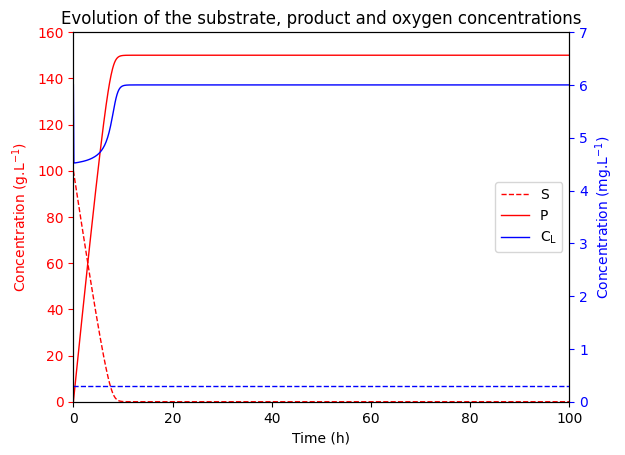

In [70]:
# Initial conditions
y0 = [100/1e-3, 6*1e-3/1e-3, 0] # S, CL, P

# Time points
t = np.linspace(0, 100, 1001)

# Solve ODE
sol = solve_ivp(model, [t[0], t[-1]], y0, method='Radau', t_eval=t)

S = sol.y[0]
CL = sol.y[1]
P = sol.y[2]

# Plot results
fig, ax1 = plt.subplots()

ax1.plot(t, S/1e3, label='S', color='red', linewidth=1, linestyle='--')
ax1.plot(t, P/1e3, label='P', color='red', linewidth=1)
ax1.set_xlabel('Time (h)')
ax1.set_ylabel(r'Concentration (g.L$^{-1}$)')
ax1.set_xlim(0, t[-1])
ax1.set_ylim(0, 160)

ax1.yaxis.label.set_color('red')
ax1.tick_params(axis='y', colors='red')

ax2 = ax1.twinx()
ax2.plot(t, CL*1000/1e3, label=r'$\mathregular{C_L}$', color='blue', linewidth=1)
ax2.hlines(KCL*1000/1e3, 0, t[-1], color='blue', linestyle='--', linewidth=1)
ax2.annotate(r'$\mathregular{K_{CL}}$', (t[-1], KCL*1000), textcoords="offset points", xytext=(-10, 10), ha='right', va='center', color='blue')
ax2.set_ylabel(r'Concentration (mg.L$^{-1}$)')
ax2.set_ylim(0, 7)

ax2.yaxis.label.set_color('blue')
ax2.tick_params(axis='y', colors='blue')

# Combine the legends
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='right')  # Combine the legends and set the location to lower right

plt.title('Evolution of the substrate, product and oxygen concentrations')
plt.show()

**b) Find the aeration rate at which the reaction becomes oxygen limited. Plot therefore the minimum dissolved oxygen concentration as a function of the aeration rate.**

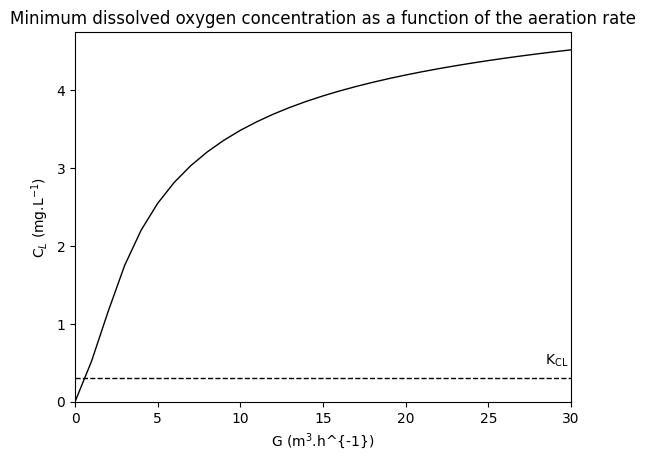

Minimum G: 1.0


In [71]:
G = np.linspace(0, 30, 31)
CLmin = np.zeros(len(G))
for i in range(len(G)):
    KLA = k*N**3*np.sqrt(i)
    sol = solve_ivp(model, [t[0], t[-1]], y0, method='Radau', t_eval=t, max_step=0.1)
    CL = sol.y[1]
    CLmin[i] = np.min(CL)

plt.plot(G, CLmin*1e3/1e3, color='black', linewidth=1)
plt.hlines(KCL, 0, G[-1], color='black', linestyles='dashed', linewidth=1)
plt.annotate(r'$\mathregular{K_{CL}}$', (G[-1], KCL*1e3/1e3), textcoords="offset points", xytext=(-10, 10), ha='center')
plt.xlabel(r'G (m$^3$.h^{-1})')
plt.ylabel(r'C$_L$ (mg.L$^{-1}$)')
plt.xlim(0, G[-1])
plt.ylim(0)
plt.title('Minimum dissolved oxygen concentration as a function of the aeration rate')
plt.show()

print(f'Minimum G: {G[CLmin >= KCL][0]}')